In [1]:
# Importing libraries


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


%matplotlib inline
from matplotlib import style
style.use("seaborn")

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

C:\Users\nayan\AppData\Local\Temp\ipykernel_20864\4118500294.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn")


In [2]:
calories = pd.read_csv('calories.csv')

In [4]:
exercise = pd.read_csv('exercise.csv')

In [6]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
data = pd.merge(calories,exercise,on='User_ID')

In [9]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [11]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [17]:
# Checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [19]:
calories_data.duplicated().any()

False

In [14]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [40]:
sns.set()

Text(0, 0.5, 'count')

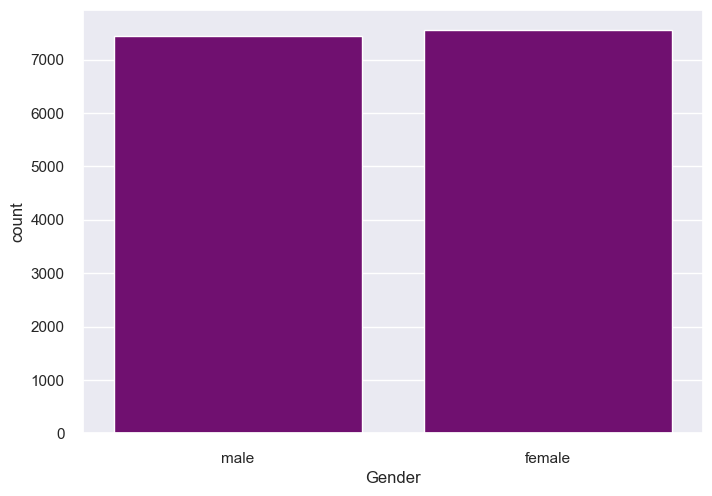

In [46]:
# plotting the gender column in count plot
sns.countplot(x=calories_data['Gender'], color='purple')
plt.xlabel('Gender')
plt.ylabel('count')

In [52]:
def plot_graph(data):

    numerical_columns = calories_data.select_dtypes(include=np.number).columns
     
    for column in numerical_columns:
        plt.figure(figsize=(5,3))
        sns.distplot(calories_data[column],kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
    categorical_columns = calories_data.select_dtypes(include='object').columns
    for column in categorical_columns:
        plt.figure(figsize=(5, 3))
        sns.countplot(x=column, data=data)
        plt.title(f"Countplot for {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

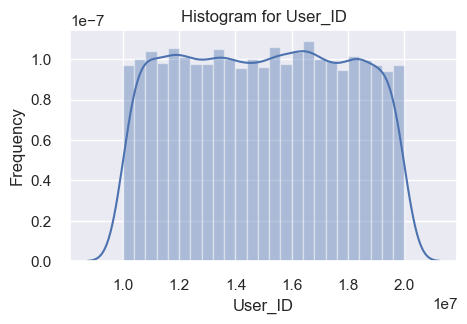

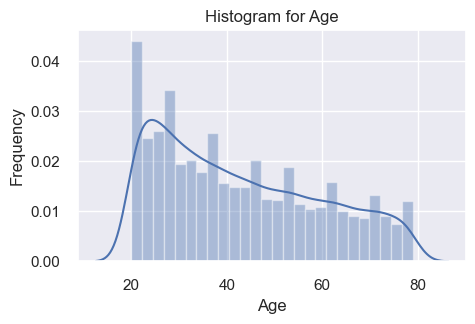

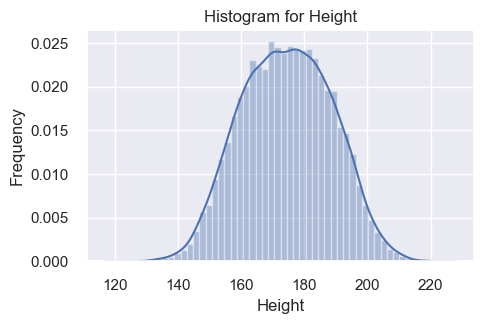

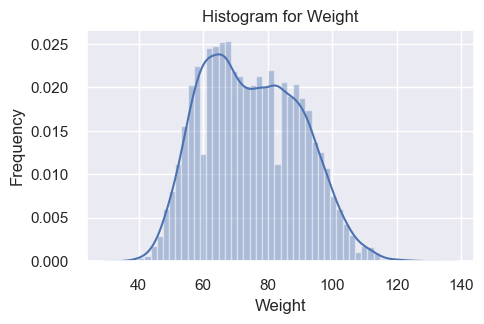

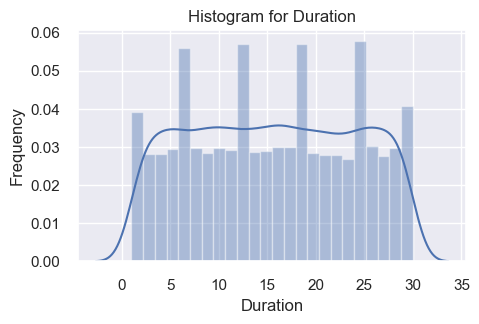

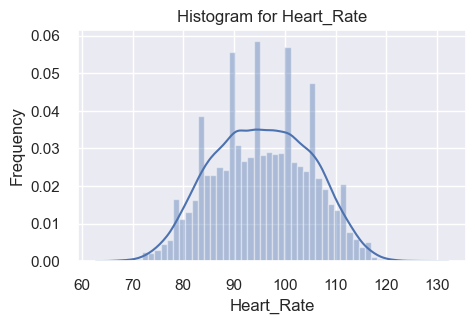

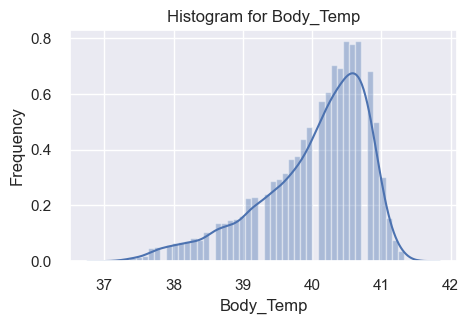

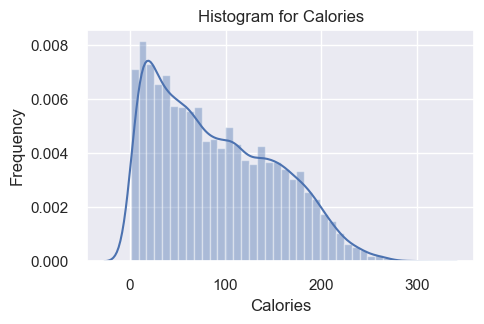

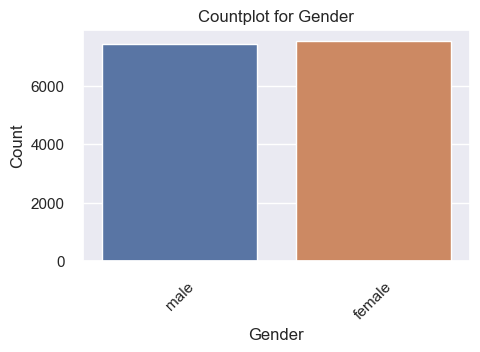

In [53]:
plot_graph(data)

In [55]:
correlation = calories_data.corr(numeric_only=True)

<Axes: >

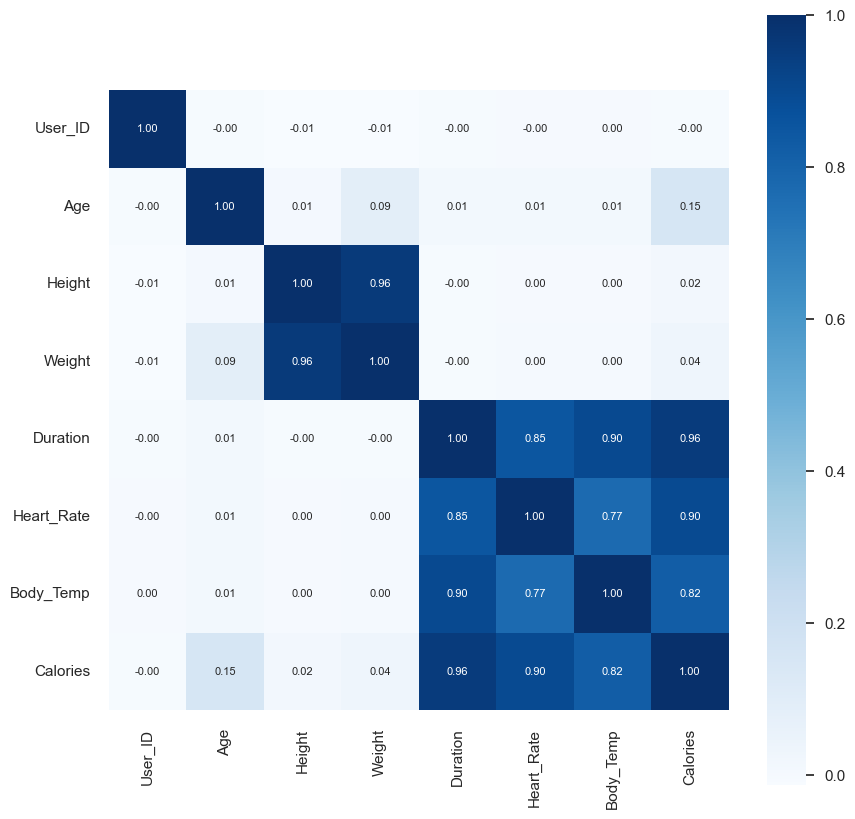

In [61]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f' ,annot=True, annot_kws={'size':8}, cmap='Blues')
          

In [63]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [64]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [65]:
X= calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y= calories_data['Calories']

In [68]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [69]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2 , random_state=2)

In [71]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [72]:
model_1 = XGBRegressor()

In [76]:
# training the model with X_train
model_1.fit(X_train, Y_train)
print(model_1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [77]:
test_data_prediction_1 = model_1.predict(X_test)

In [81]:
from sklearn.metrics import r2_score
r2_score(Y_test,test_data_prediction_1)

0.998800624504713

In [84]:
metrics.mean_absolute_error(Y_test, test_data_prediction_1)

1.4833678883314132

<Axes: xlabel='Calories', ylabel='Density'>

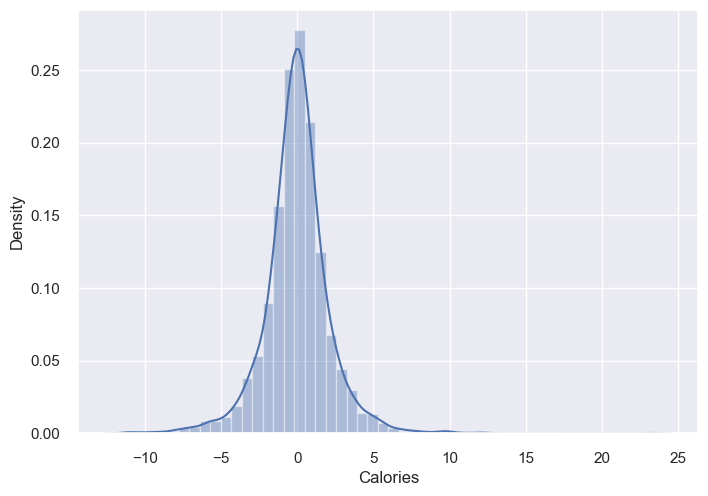

In [106]:
sns.distplot(Y_test-test_data_prediction_1)

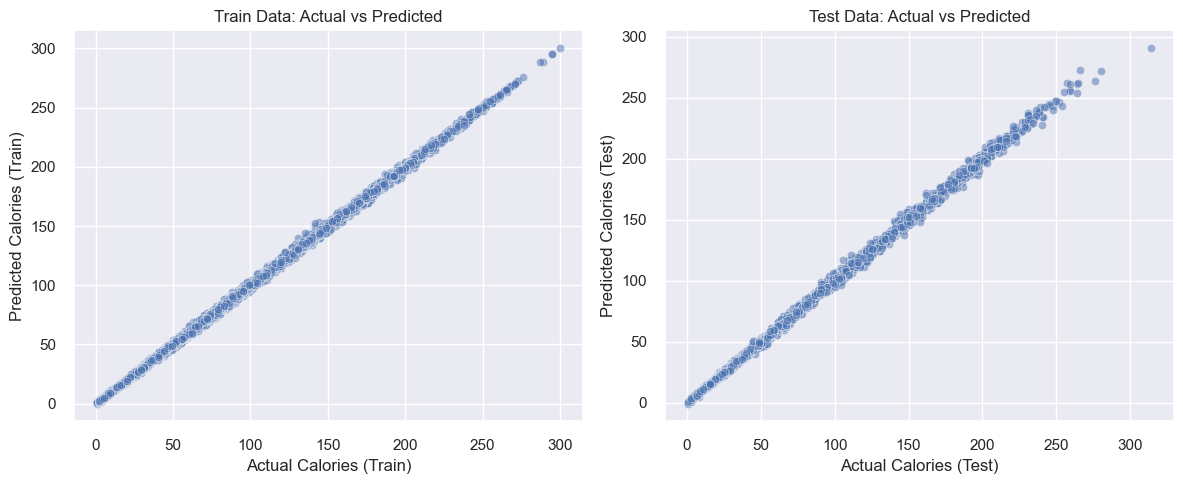

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting on train and test data
train_predictions = model_1.predict(X_train)
test_predictions = model_1.predict(X_test)

# Plot actual vs predicted for train and test sets
plt.figure(figsize=(12, 5))

# Train data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_train, y=train_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Train)")
plt.ylabel("Predicted Calories (Train)")
plt.title("Train Data: Actual vs Predicted")

# Test data plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=Y_test, y=test_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Test)")
plt.ylabel("Predicted Calories (Test)")
plt.title("Test Data: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [85]:
model_2 = LinearRegression()

In [87]:
# training the model with X_train
model_2.fit(X_train, Y_train)
print(model_2)

LinearRegression()


In [90]:
test_data_prediction_2 = model_2.predict(X_test)

In [92]:
from sklearn.metrics import r2_score
r2_score(Y_test,test_data_prediction_2)

0.9668790377181355

In [93]:
metrics.mean_absolute_error(Y_test, test_data_prediction_2)

8.385188053147187

<Axes: xlabel='Calories', ylabel='Density'>

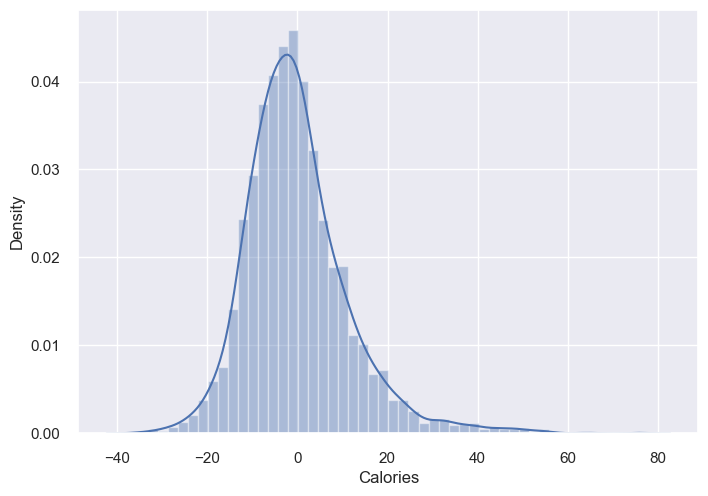

In [107]:
sns.distplot(Y_test-test_data_prediction_2)

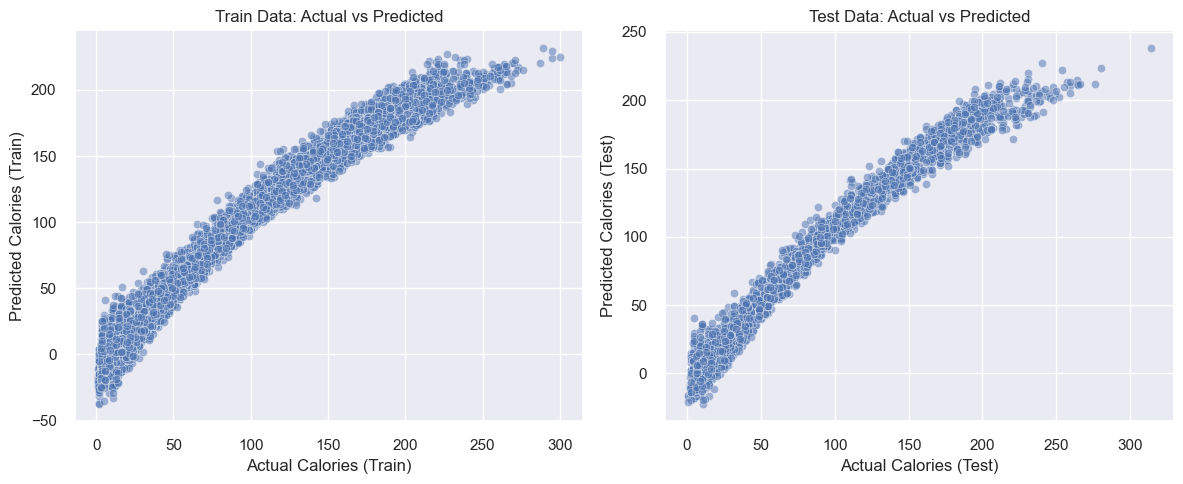

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting on train and test data
train_predictions = model_2.predict(X_train)
test_predictions = model_2.predict(X_test)

# Plot actual vs predicted for train and test sets
plt.figure(figsize=(12, 5))

# Train data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_train, y=train_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Train)")
plt.ylabel("Predicted Calories (Train)")
plt.title("Train Data: Actual vs Predicted")

# Test data plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=Y_test, y=test_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Test)")
plt.ylabel("Predicted Calories (Test)")
plt.title("Test Data: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [94]:
model_3 = DecisionTreeRegressor()

In [96]:
# training the model with X_train
model_3.fit(X_train, Y_train)
print(model_3)

DecisionTreeRegressor()


In [97]:
test_data_prediction_3 = model_3.predict(X_test)

In [98]:
from sklearn.metrics import r2_score
r2_score(Y_test,test_data_prediction_3)

0.9926193086925178

In [99]:
metrics.mean_absolute_error(Y_test, test_data_prediction_3)

3.4266666666666667

<Axes: xlabel='Calories', ylabel='Density'>

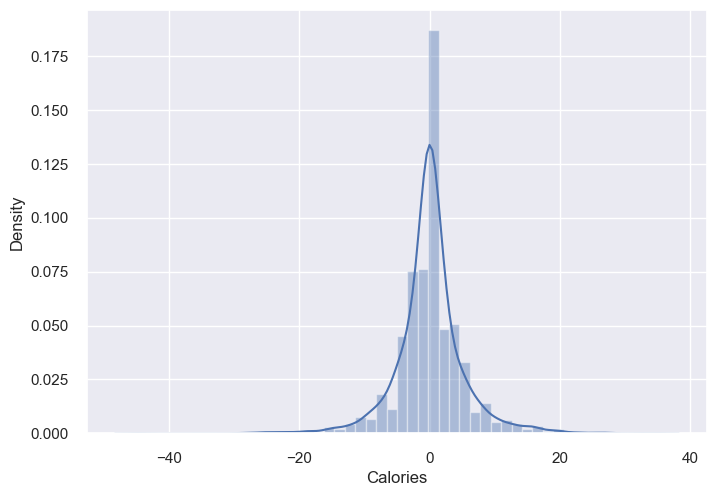

In [108]:
sns.distplot(Y_test-test_data_prediction_3)

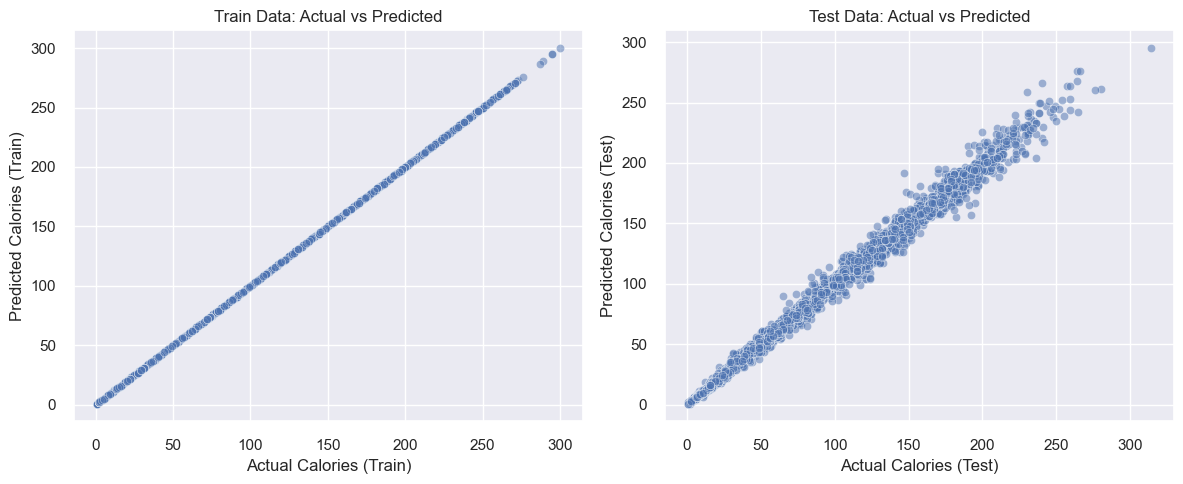

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting on train and test data
train_predictions = model_3.predict(X_train)
test_predictions = model_3.predict(X_test)

# Plot actual vs predicted for train and test sets
plt.figure(figsize=(12, 5))

# Train data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_train, y=train_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Train)")
plt.ylabel("Predicted Calories (Train)")
plt.title("Train Data: Actual vs Predicted")

# Test data plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=Y_test, y=test_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Test)")
plt.ylabel("Predicted Calories (Test)")
plt.title("Test Data: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [100]:
model_4 = RandomForestRegressor()

In [101]:
# training the model with X_train
model_4.fit(X_train, Y_train)
print(model_4)

RandomForestRegressor()


In [103]:
test_data_prediction_4 = model_4.predict(X_test)

In [104]:
from sklearn.metrics import r2_score
r2_score(Y_test,test_data_prediction_4)

0.9982221939437704

In [105]:
metrics.mean_absolute_error(Y_test, test_data_prediction_4)

1.6851600000000002

<Axes: xlabel='Calories', ylabel='Density'>

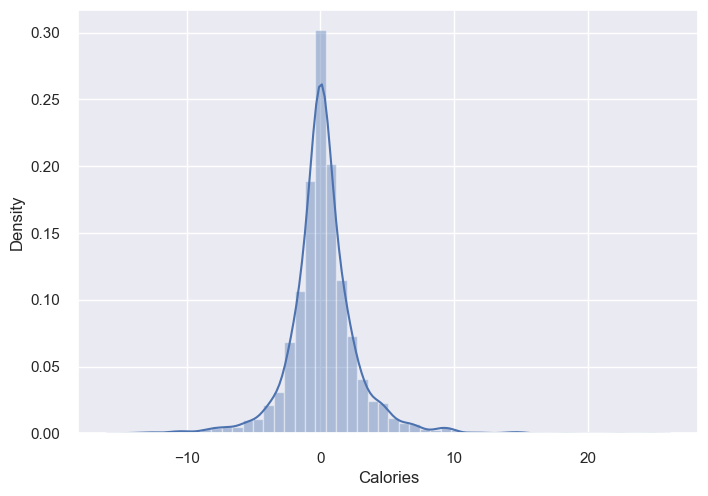

In [109]:
sns.distplot(Y_test-test_data_prediction_4)

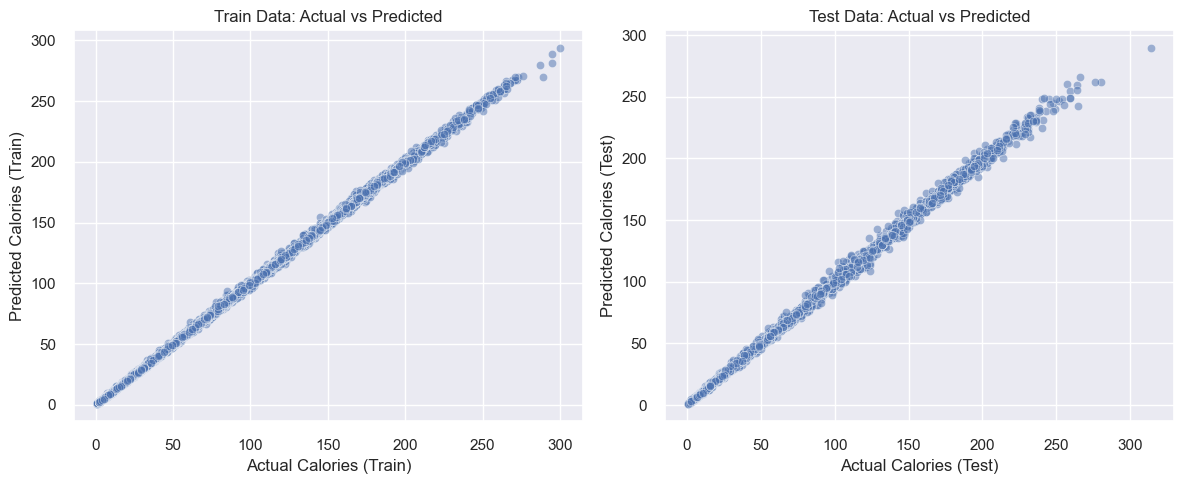

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting on train and test data
train_predictions = model_4.predict(X_train)
test_predictions = model_4.predict(X_test)

# Plot actual vs predicted for train and test sets
plt.figure(figsize=(12, 5))

# Train data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_train, y=train_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Train)")
plt.ylabel("Predicted Calories (Train)")
plt.title("Train Data: Actual vs Predicted")

# Test data plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=Y_test, y=test_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Test)")
plt.ylabel("Predicted Calories (Test)")
plt.title("Test Data: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [115]:
import pickle

pickle.dump(model_1, open('model_1.pkl', 'wb'))
pickle.dump(model_2, open('model_2.pkl', 'wb'))
pickle.dump(model_3, open('model_3.pkl', 'wb'))
pickle.dump(model_4, open('model_4.pkl', 'wb'))